## Ring Network and Propagation

This jupyter notebook defines a ring network and propagates an illness through this network 

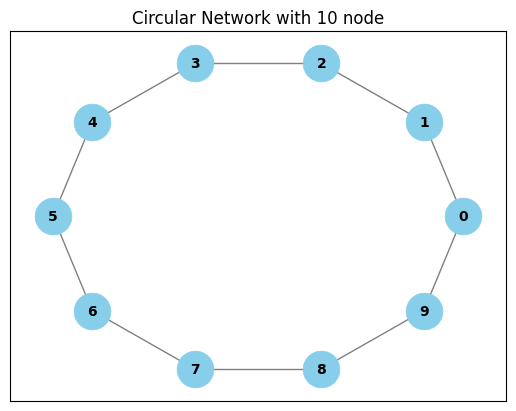

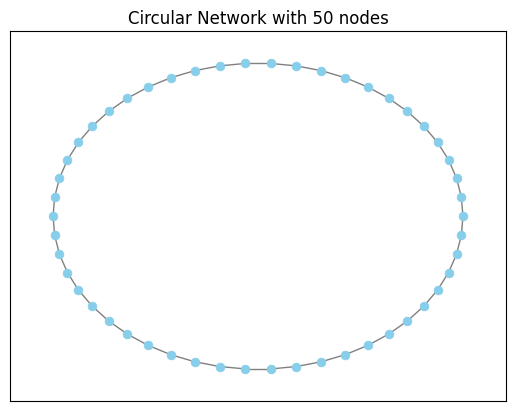

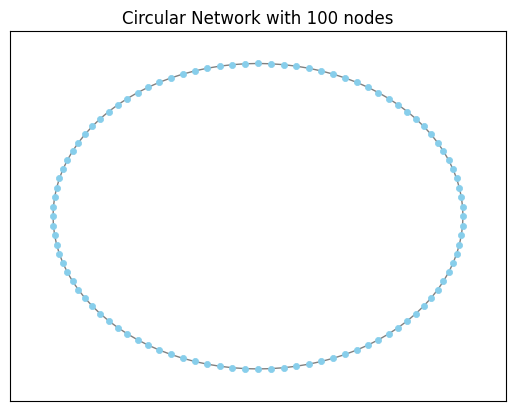

In [4]:
#Defining a ring network 
import networkx as nx
import matplotlib.pyplot as plt
import copy

G = nx.cycle_graph(10)
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
plt.title("Circular Network with 10 node")
plt.show()

G = nx.cycle_graph(50)
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=40, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
plt.title("Circular Network with 50 nodes")
plt.show()

G = nx.cycle_graph(100)
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=20, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
plt.title("Circular Network with 100 nodes")
plt.show()


## The code underneath is used to propagate an illness through the network

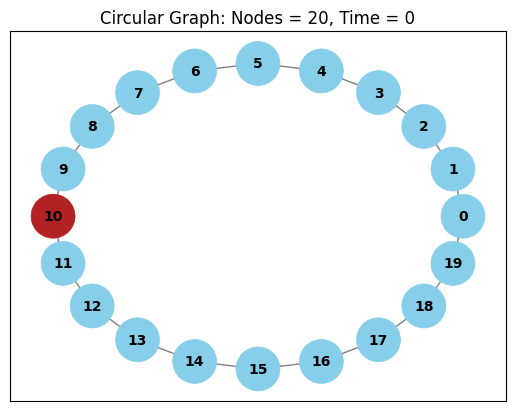

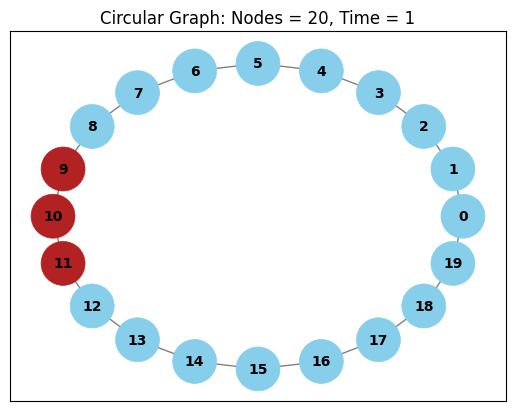

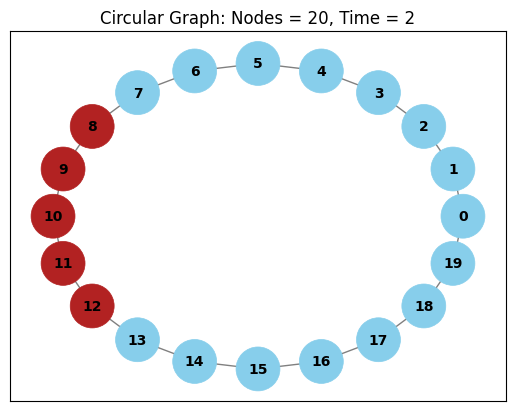

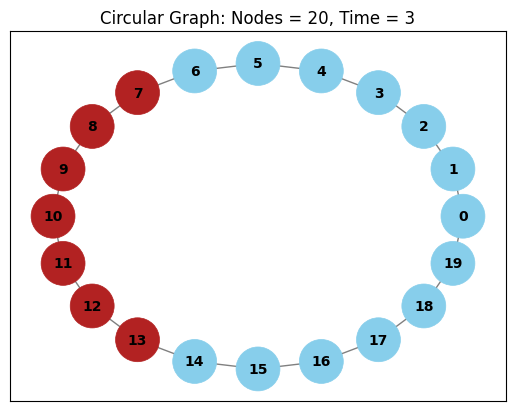

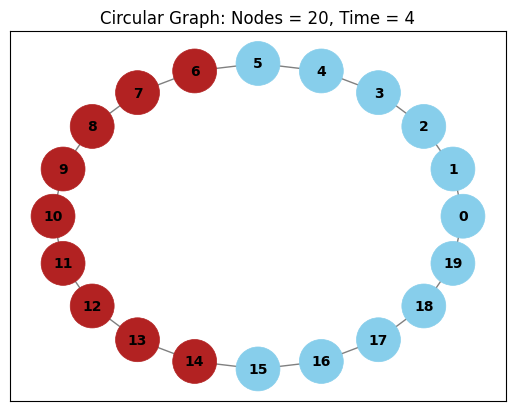

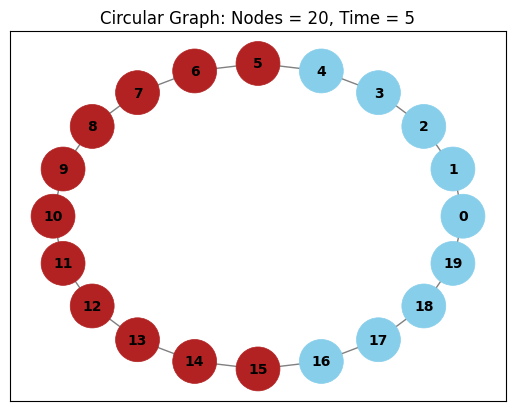

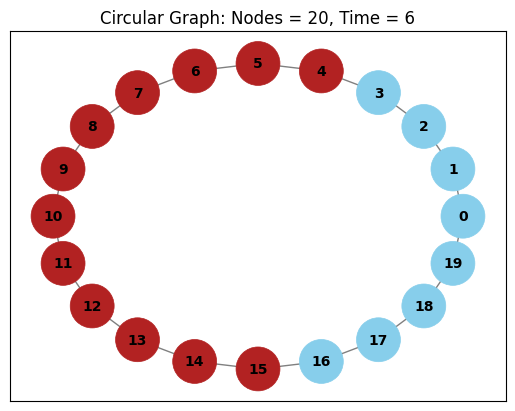

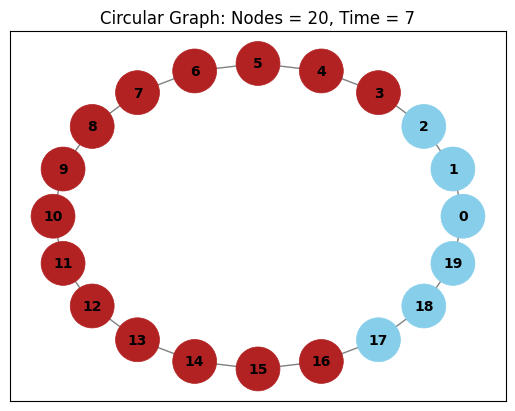

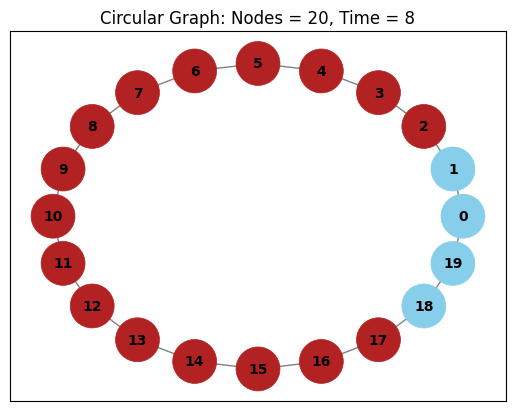

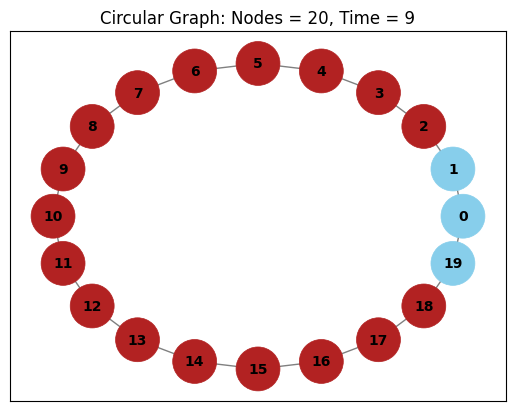

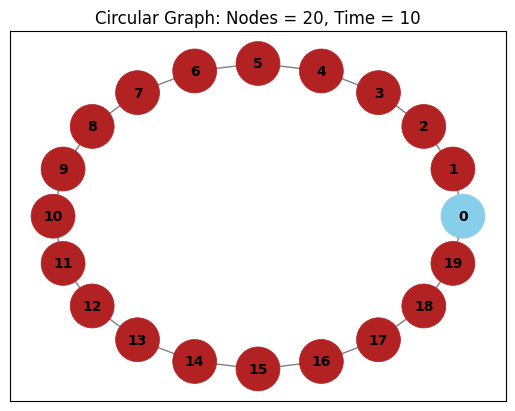

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import copy
np.random.seed(123)

class Propagate_Ring():
    
    def __init__(self, nodes: int,prob: float ,sicknode = None):
        self.g = nx.cycle_graph(nodes)
        self.pos = nx.circular_layout(self.g)
        self.n = nodes
        self.t = 0
        self.p = prob
        if not sicknode:
            self.sicknodes = set([])
        else:
            self.sicknodes = set([sicknode])
    
    def plot(self):
        node_colors = ["firebrick" if node in self.sicknodes else "skyblue" for node in self.g.nodes()]
        nx.draw_networkx(self.g, pos = self.pos, with_labels=True, node_size=20000/self.n, node_color=node_colors, font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
        plt.title("Circular Graph: Nodes = "+ str(self.n)+ ", Time = " + str(self.t))
        plt.show()
        return
    
    #def sicknode
    def go(self, steps: int):
        #Plot initial network
        self.plot()
        for time in range(steps):
            #check sick nodes
            currentsick = copy.copy(self.sicknodes) #as new sick nodes may be created and we don't want to loop through the new ones
            #print("sicknodes:", currentsick)
            for node in currentsick:
                #print("sicknode:",node)
                neighbours = list(self.g.neighbors(node))
                #try to propagate sickness
                for neighbour in neighbours:
                    if np.random.random() < self.p:
                        self.sicknodes.add(neighbour)
                       
            self.t += 1 #timestep increase by 1
            self.plot()
                        
        return


G = Propagate_Ring(20, 0.8, 10).go(10)

## Small Worlds Propagation

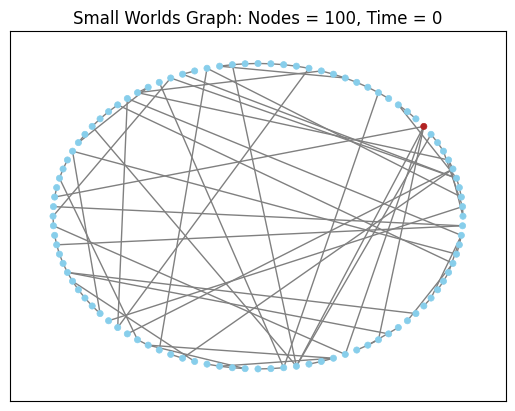

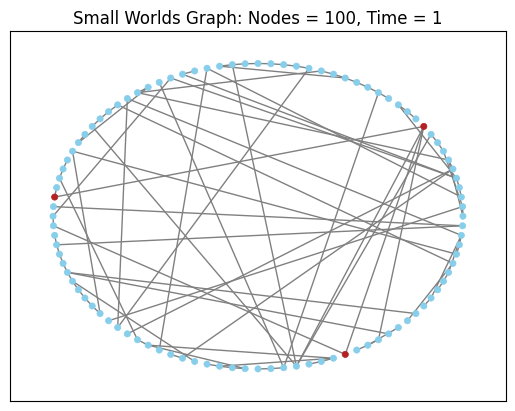

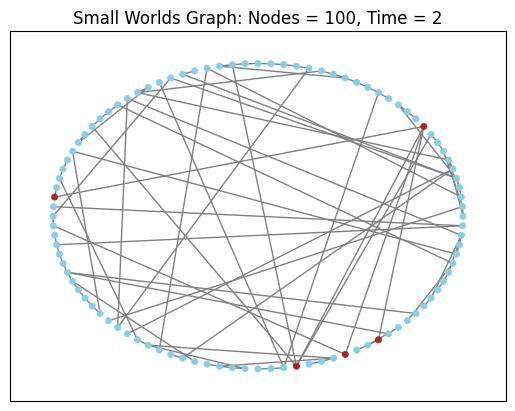

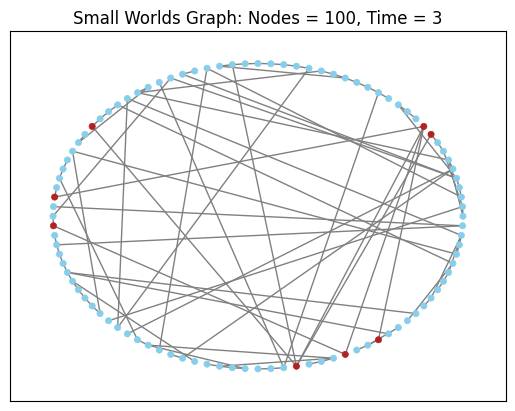

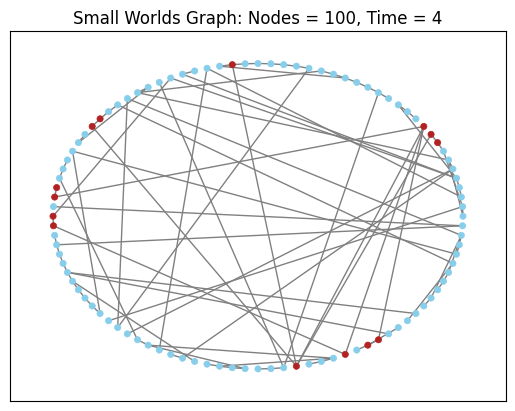

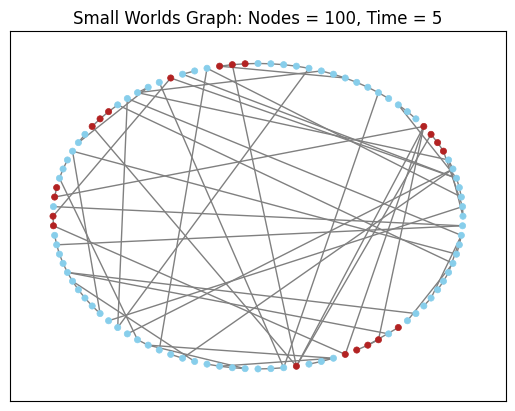

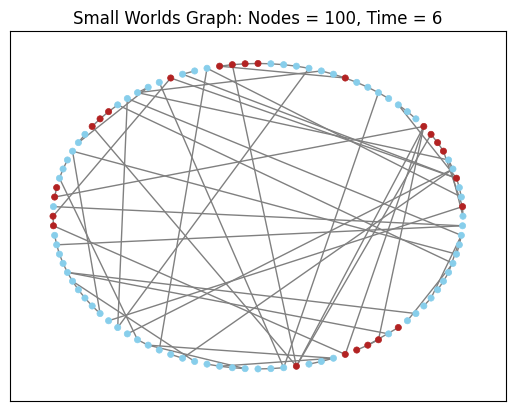

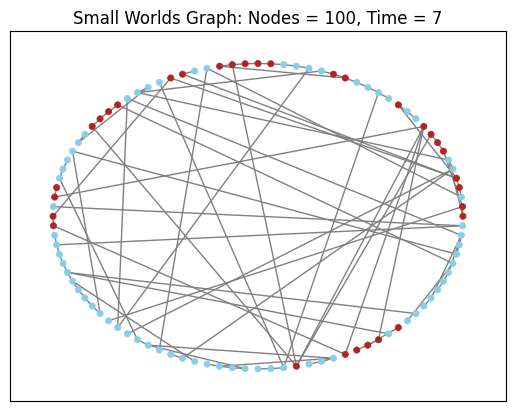

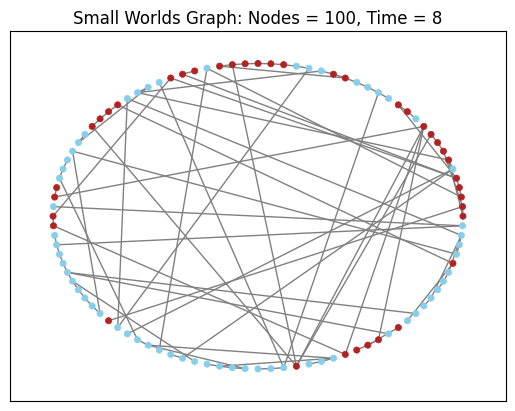

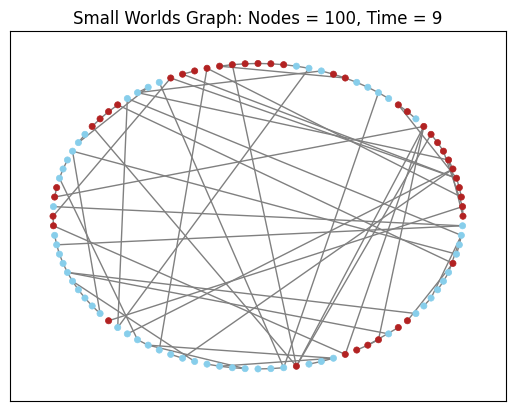

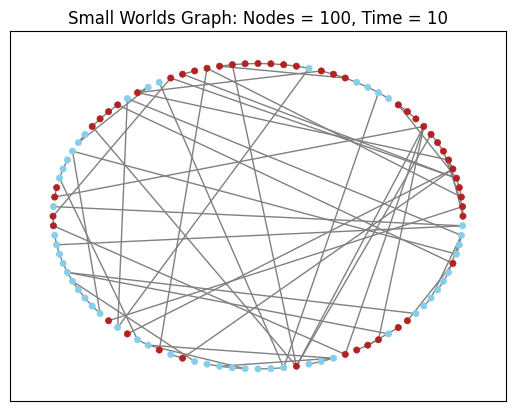

In [7]:
#G = nx.watts_strogatz_graph(n = 100, k = 3, p = 0.5, seed=None)
#pos = nx.circular_layout(G)
#nx.draw_networkx(G, pos, with_labels=False, node_size=20, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)

class Propagate_SW():
    
    def __init__(self, nodes: int,pandemicprob: float ,sicknode = None, SW_connections = 3, SW_randomness = 0.5, plots = False):
        self.g = nx.watts_strogatz_graph(n = nodes, k = SW_connections, p = SW_randomness, seed=None)
        self.pos = nx.circular_layout(self.g)
        self.n = nodes
        self.t = 0
        self.p = pandemicprob
        self.want_plots = plots
        if not sicknode:
            self.sicknodes = set([])
        else:
            self.sicknodes = set([sicknode])
    
    def plot(self):
        node_colors = ["firebrick" if node in self.sicknodes else "skyblue" for node in self.g.nodes()]
        nx.draw_networkx(self.g, pos = self.pos, with_labels=False, node_size=2000/self.n, node_color=node_colors, edge_color="gray", linewidths=0.5)
        plt.title("Small Worlds Graph: Nodes = "+ str(self.n)+ ", Time = " + str(self.t))
        plt.show()
        return
    
    #def sicknode
    def go(self, steps: int):
        #Plot initial network
        self.plot()
        for time in range(steps):
            #check sick nodes
            currentsick = copy.copy(self.sicknodes) #as new sick nodes may be created and we don't want to loop through the new ones
            #print("sicknodes:", currentsick)
            for node in currentsick:
                #print("sicknode:",node)
                neighbours = list(self.g.neighbors(node))
                #try to propagate sickness
                for neighbour in neighbours:
                    if np.random.random() < self.p:
                        self.sicknodes.add(neighbour)
                       
            self.t += 1 #timestep increase by 1
            
            if self.want_plots: 
                self.plot()
                        
        return
    
    
G = Propagate_SW(100, 0.8, 10, plots = True).go(10)

## Barabasi Albert Propagation

In [5]:
class Propagate_BA():
    
    def __init__(self, nodes: int,pandemicprob: float ,sicknode = None, new_nodes_connections = 1, plots = False):
        self.g = nx.barabasi_albert_graph(n = nodes, m = new_nodes_connections, seed=None, initial_graph = None)
        self.pos = nx.circular_layout(self.g)
        self.n = nodes
        self.t = 0
        self.p = pandemicprob
        self.want_plots = plots
        if not sicknode:
            self.sicknodes = set([])
        else:
            self.sicknodes = set([sicknode])
    
    def plot(self):
        node_colors = ["firebrick" if node in self.sicknodes else "skyblue" for node in self.g.nodes()]
        nx.draw_networkx(self.g, pos = self.pos, with_labels=False, node_size=2000/self.n, node_color=node_colors, edge_color="gray", linewidths=0.5)
        plt.title("Barabasi-Albert Graph: Nodes = "+ str(self.n)+ ", Time = " + str(self.t))
        plt.show()
        return
    
    #def sicknode
    def go(self, steps: int):
        #Plot initial network
        self.plot()
        for time in range(steps):
            #check sick nodes
            currentsick = copy.copy(self.sicknodes) #as new sick nodes may be created and we don't want to loop through the new ones
            #print("sicknodes:", currentsick)
            for node in currentsick:
                #print("sicknode:",node)
                neighbours = list(self.g.neighbors(node))
                #try to propagate sickness
                for neighbour in neighbours:
                    if np.random.random() < self.p:
                        self.sicknodes.add(neighbour)
                       
            self.t += 1 #timestep increase by 1
            
            if self.want_plots: 
                self.plot()
                        
        return
    

In [20]:
class gen_propagate():
    def __init__(self, G, pandemicprob: float ,initialsick = 1, TTR = 15):
        self.g = G
        self.pos = nx.circular_layout(self.g)
        self.n = G.number_of_nodes()
        self.t = 0
        self.p = pandemicprob
        if not initialsick:
            self.sicknodes = set([])
        else:
            for i in range(initialsick):
                self.sicknodes = set(random.randint(self.g.number_of_nodes))
                
        self.recovered = set([])
    
    def plot(self):
        node_colors = ["firebrick" if node in self.sicknodes else "skyblue" for node in self.g.nodes()]
        nx.draw_networkx(self.g, pos = self.pos, with_labels=False, node_size=2000/self.n, node_color=node_colors, edge_color="gray", linewidths=0.5)
        plt.title("Graph Plot: Nodes = "+ str(self.n)+ ", Time = " + str(self.t))
        plt.show()
        return
    
    #def sicknode
    def go(self, plot = False):
        #Plot initial network
        N = self.g.number_of_nodes()
        while len(self.sicknodes) > 0 or len(self.sicknodes)+len(self.recovered) == N: #Propagate until everyone has recovered or everyone is either sick or recovered
            currentsick = copy.copy(self.sicknodes)
            
            #Dealing with recovery
            for i in range(len(list(self.g.nodes))): 
                if self.g.nodes[i]['TTR'] - 1 == 0: # end of infectious period
                    self.sicknodes.remove(i)
                    self.recovered.add(i)
                    nx.set_node_attributes(self.g, {i: self.g.nodes[i]['TTR'] - 1}, name='TTR') # decrement TTR value
                elif self.g.nodes[i]['TTR'] == 0: # not infectious, no action
                    pass
                else: # mid infectious period
                    nx.set_node_attributes(self.g, {i: self.g.nodes[i]['TTR'] - 1}, name='TTR') # decrement TTR value
            
            #Checking for spread
            currentsick = copy.copy(self.sicknodes) #as new sick nodes may be created and we don't want to loop through the new ones
            print(currentsick)
            #print("sicknodes:", currentsick)
            for node in currentsick:
                #print("sicknode:",node)
                neighbours = list(self.g.neighbors(node))
                #try to propagate sickness
                for neighbour in neighbours:
                    if np.random.random() < self.p:
                        self.sicknodes.add(neighbour)
                       
            self.t += 1 #timestep increase by 1
            #print(len(self.sicknodes))
            if plot == True:
                self.plot()
                
        return self.t
    
g = nx.watts_strogatz_graph(50, k = 4, p = 0.4)   
test = gen_propagate(g, 0.2, 1)
test.go(True)

NameError: name 'random' is not defined

## Comparing Network Topologies
To compare how network topologies affect the spread of a disease, look at how the number of nodes and the average number of edges affect the speed of disease spread

In [7]:
def average_edges(g):
    return (2*g.number_of_edges())/g.number_of_nodes()

In [134]:
#When comparing the number of nodes to timesteps required to infect entire population keep average edges per node to be approximately 4

ring_timesteps = []
nodes = [10,50,100,500,1000,2000,5000,10000,25000,50000,75000,100000, 150000,200000,250000,300000] 
m = 2
k = 4
SWt = []
Ringt = []
SFt = []
SWE = []
SFE = []
for j in range(10):
    ring_timesteps = []
    SW_timesteps = []
    BA_timesteps = []
    avg_BA_edge = []
    avg_SW_edge = []
    for i in range(len(nodes)):
        n = nodes[i]
        print(n)

        #Barabasi
        g = nx.barabasi_albert_graph(n, m, seed= None, initial_graph = None)
        BA_prop = gen_propagate(g, 0.2)
        BA_timesteps.append(BA_prop.go())
        avg_BA_edge.append(average_edges(g))

        #Small World
        g = nx.watts_strogatz_graph(n= n, k = k, p = 0.2) #let random be 0.5
        SW_prop = gen_propagate(g, 0.2)
        SW_timesteps.append(SW_prop.go())
        avg_SW_edge.append(average_edges(g))

        #Ring
        g = nx.watts_strogatz_graph(n= n, k = k, p = 0)
        ring_prop = gen_propagate(g, 0.2)
        ring_timesteps.append(ring_prop.go())
        
    
    SWt.append(SW_timesteps)
    SWE.append(avg_SW_edge)
    Ringt.append(ring_timesteps)
    SFt.append(BA_timesteps)
    SFE.append(avg_BA_edge)
    

10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000
10
50
100
500
1000
2000
5000
10000
25000
50000
75000
100000
150000
200000
250000
300000


In [10]:
def average(points: list[list]):
    mean_list = []
    std_list = []
    for i in range(len(points[0])):
        mean_list.append(np.mean([points[j][i] for j in range(len(points))]))
        std_list.append(np.std([points[j][i] for j in range(len(points))]))
        
    return mean_list, std_list

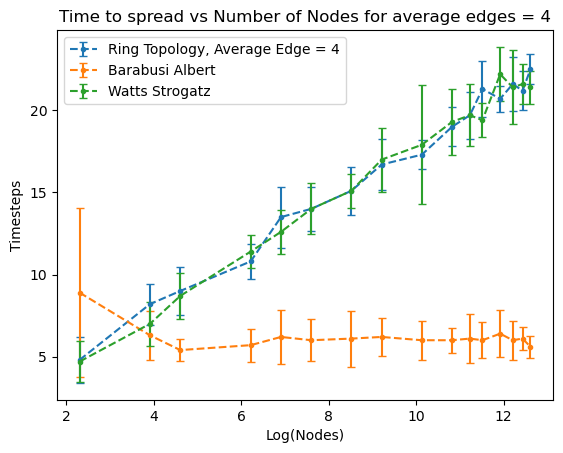

In [147]:
import matplotlib.pyplot as plt
import numpy as np


#Averaging times
mean_SWtime, err_SWtime = average(SWt)
mean_Ringtime, err_Ringtime = average(Ringt)
mean_SFtime, err_SFtime = average(SFt)

#Averaging edges
mean_SWedge, err_SWedge = average(SWE)
mean_SFedge, err_SFedge = average(SFE)

plt.errorbar(np.log(nodes), mean_Ringtime, yerr= err_Ringtime, label = "Ring Topology", marker = '.', linestyle = 'dashed', capsize = 3)
plt.errorbar(np.log(nodes), mean_SFtime, yerr = err_SFtime, label = "Scale Free", marker = '.', linestyle = 'dashed', capsize = 3)
plt.errorbar(np.log(nodes), mean_SWtime, yerr = err_SWtime, label = "Small Worlds", marker = '.', linestyle = 'dashed', capsize = 3)
plt.legend()
plt.ylabel("Timesteps")
plt.xlabel("Log(Nodes)")
plt.title("Time to spread vs Number of Nodes for average edges = 4")
plt.show()

In [104]:
print(average_edges(nx.barabasi_albert_graph(n= 250, m = 2)))
#print(average_edges(nx.watts_strogatz_graph(n= 200000, k = 4, p = 0.2)))
#print(average_edges(nx.watts_strogatz_graph(n= 100000, k = 6, p = 0)))

3.968


## Investigating how changing average connection per node affects propagation

In [8]:
ring_times = []
ring_edges = []
BA_times = []
BA_edges = []
SW_times = []
SW_edges = []
for j in range(10):
    print(j)
    rtime, redge = [], []
    swtime, swedge = [], []
    sftime, sfedge = [], []
    k = 2
    m = 1
    for i in range(15):
        #Ring
        g = nx.watts_strogatz_graph(n= 100000, k = k, p = 0)
        ring_prop = gen_propagate(g, 0.5)
        rtime.append(ring_prop.go())
        redge.append(average_edges(g))

        #Small Worlds
        g = nx.watts_strogatz_graph(n= 100000, k = k, p = 0.2)
        sw_prop = gen_propagate(g, 0.5)
        swtime.append(sw_prop.go())
        swedge.append(average_edges(g))

        #Barabasi Albert
        g = nx.barabasi_albert_graph(n= 100000, m = m)
        ba_prop = gen_propagate(g, 0.5)
        sftime.append(ba_prop.go())
        sfedge.append(average_edges(g))

        m += 1
        k += 2
    
    ring_times.append(rtime)
    ring_edges.append(redge)
    BA_times.append(sftime)
    BA_edges.append(sfedge)
    SW_times.append(swtime)
    SW_edges.append(swedge)
    
    

0
1
2
3
4
5
6
7
8
9


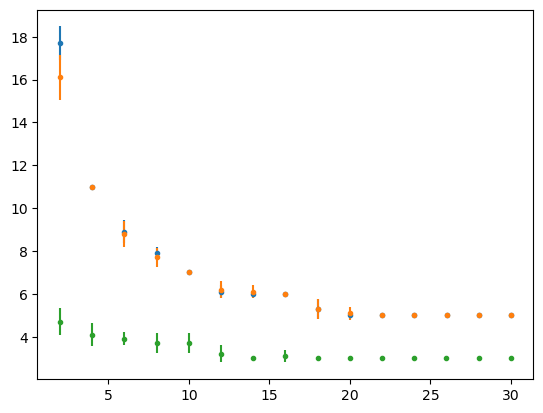

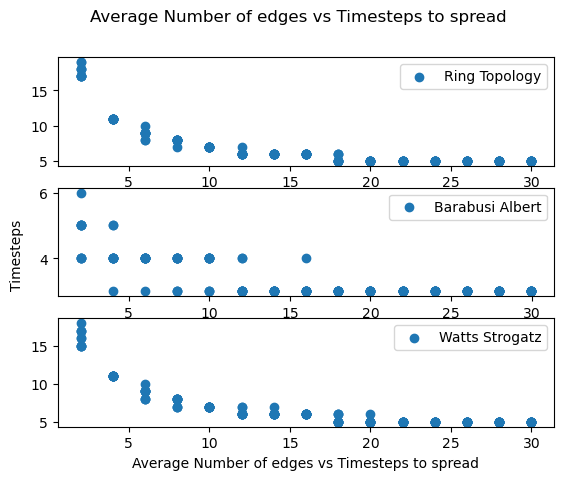

In [14]:
import matplotlib.pyplot as plt
import numpy as np

#Ring
meanring_t, stdring_t = average(ring_times)
meanring_e, stdring_e = average(ring_edges)
#SW
meansw_t, stdsw_t = average(SW_times)
meansw_e, stdsw_e = average(SW_edges)
#SF
meansf_t, stdsf_t = average(BA_times)
meansf_e, stdsf_e = average(BA_edges)

plt.errorbar(meanring_e, meanring_t, yerr = stdring_t, xerr = stdring_e, marker = '.', linestyle = 'None')
plt.errorbar(meansw_e, meansw_t, yerr = stdsw_t, xerr = stdsw_e, marker = '.', linestyle = 'None')
plt.errorbar(meansf_e, meansf_t, yerr = stdsf_t, xerr = stdsf_e, marker = '.', linestyle = 'None')
plt.show()


fig, (ax0,ax1,ax2) = plt.subplots(3)
ax0.scatter(ring_edges, ring_times, label = "Ring Topology")
ax1.scatter(BA_edges, BA_times, label = "Barabusi Albert")
ax2.scatter(SW_edges, SW_times, label = "Watts Strogatz")
ax0.legend()
ax1.legend()
ax2.legend()
ax2.set_xlabel("Average Number of edges vs Timesteps to spread")
fig.text(0.05, 0.4,"Timesteps", rotation = 'vertical')
plt.suptitle("Average Number of edges vs Timesteps to spread")
plt.show()